In [2]:
import numpy as np
import pandas as pd

In [93]:
housing_pp = pd.read_csv('housing_pp.csv', index_col=0)
housing_pp.shape

(2579, 81)

In [17]:
y = housing_pp.SalePrice
X = housing_pp.drop(['SalePrice', 'PID'], axis =1).copy()

<Axes: >

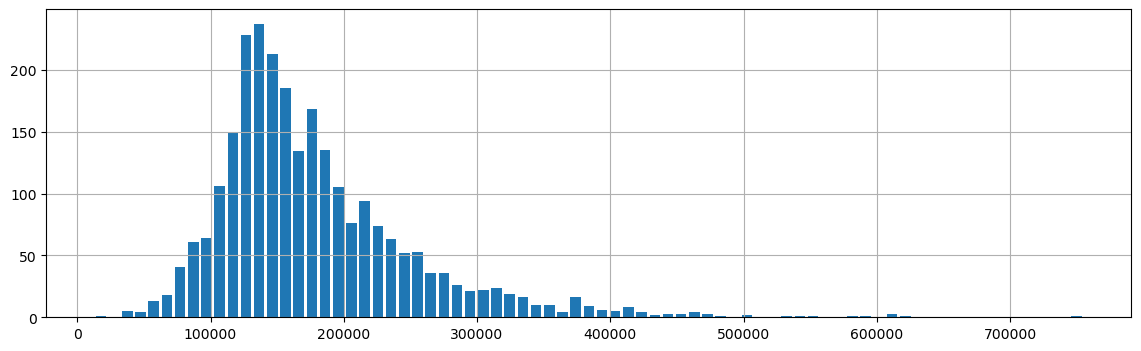

In [6]:
y.hist(bins=75, rwidth=.8, figsize=(14,4))

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, QuantileTransformer


In [94]:
df = housing_pp
df

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,909176150,856,126000,30,RL,62.472926,7890,Pave,0.0,1,...,166,0,0.0,NaN,NaN,0,3,2010,WD,Normal
1,905476230,1049,139500,120,RL,42.000000,4235,Pave,0.0,1,...,0,0,0.0,NaN,NaN,0,2,2009,WD,Normal
2,911128020,1001,124900,30,C (all),60.000000,6060,Pave,0.0,1,...,0,0,0.0,NaN,NaN,0,11,2007,WD,Normal
3,535377150,1039,114000,70,RL,80.000000,8146,Pave,0.0,1,...,111,0,0.0,NaN,NaN,0,5,2009,WD,Normal
4,534177230,1665,227000,60,RL,70.000000,8400,Pave,0.0,1,...,0,0,0.0,NaN,NaN,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,903205040,952,121000,30,RL,70.105866,8854,Pave,0.0,1,...,40,0,0.0,NaN,NaN,0,5,2009,WD,Normal
2576,905402060,1733,139600,20,RL,108.318076,13680,Pave,0.0,2,...,0,0,0.0,NaN,NaN,0,6,2009,WD,Normal
2577,909275030,2002,145000,90,RH,82.000000,6270,Pave,0.0,1,...,0,0,0.0,NaN,NaN,0,8,2007,WD,Normal
2578,907192040,1842,217500,60,RL,69.884162,8826,Pave,0.0,1,...,0,0,0.0,NaN,NaN,0,7,2007,WD,Normal


ValueError: num must be an integer with 1 <= num <= 12, not 13

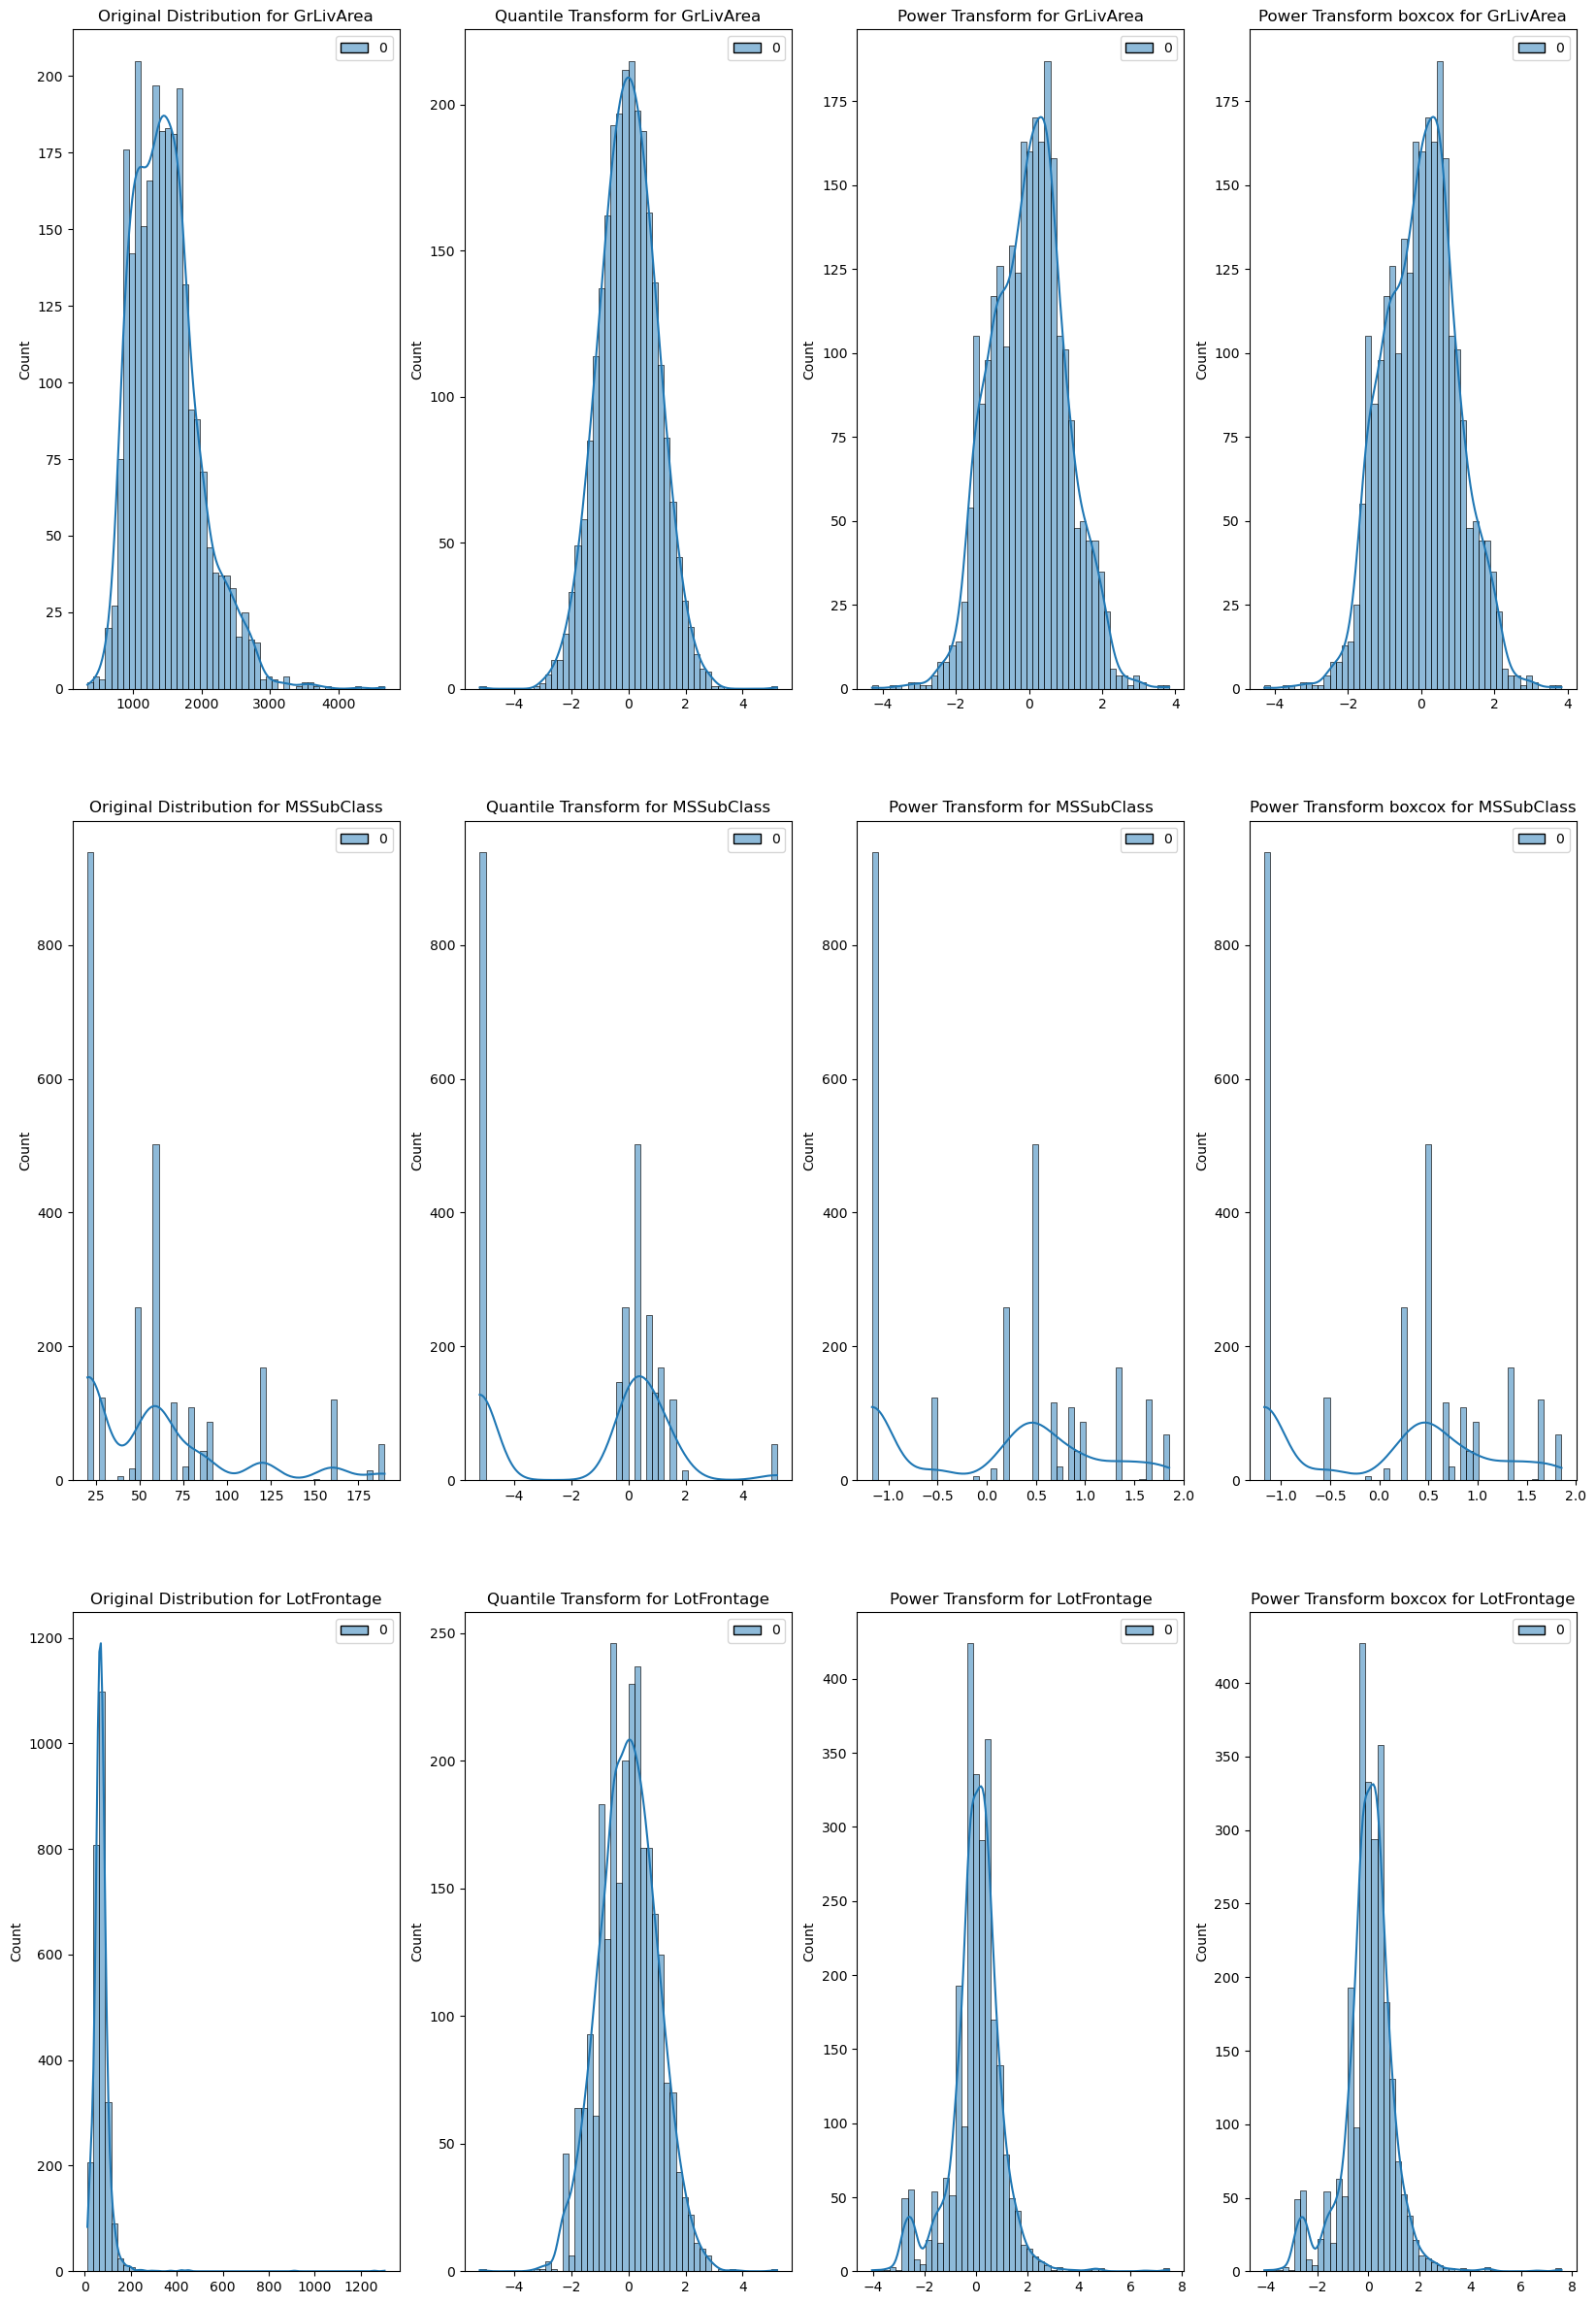

In [112]:
cols1 = df[numerical_columns].columns
def test_transformers(columns):
    pt = PowerTransformer()
    ptbc = PowerTransformer(method='box-cox')
    qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
    fig = plt.figure(figsize=(20,30))
    j = 1
    for i in columns:
        array = np.array(df[i]).reshape(-1, 1)
        y = pt.fit_transform(array)
        z = ptbc.fit_transform(array)
        x = qt.fit_transform(array)
        plt.subplot(3,4,j)
        sns.histplot(array, bins = 50, kde = True)
        plt.title(f"Original Distribution for {i}")
        plt.subplot(3,4,j+1)
        sns.histplot(x, bins = 50, kde = True)
        plt.title(f"Quantile Transform for {i}")
        plt.subplot(3,4,j+2)
        sns.histplot(y, bins = 50, kde = True)
        plt.title(f"Power Transform for {i}")
        plt.subplot(3,4,j+3)
        sns.histplot(z, bins = 50, kde = True)
        plt.title(f"Power Transform boxcox for {i}")
        j += 4
test_transformers(cols1)

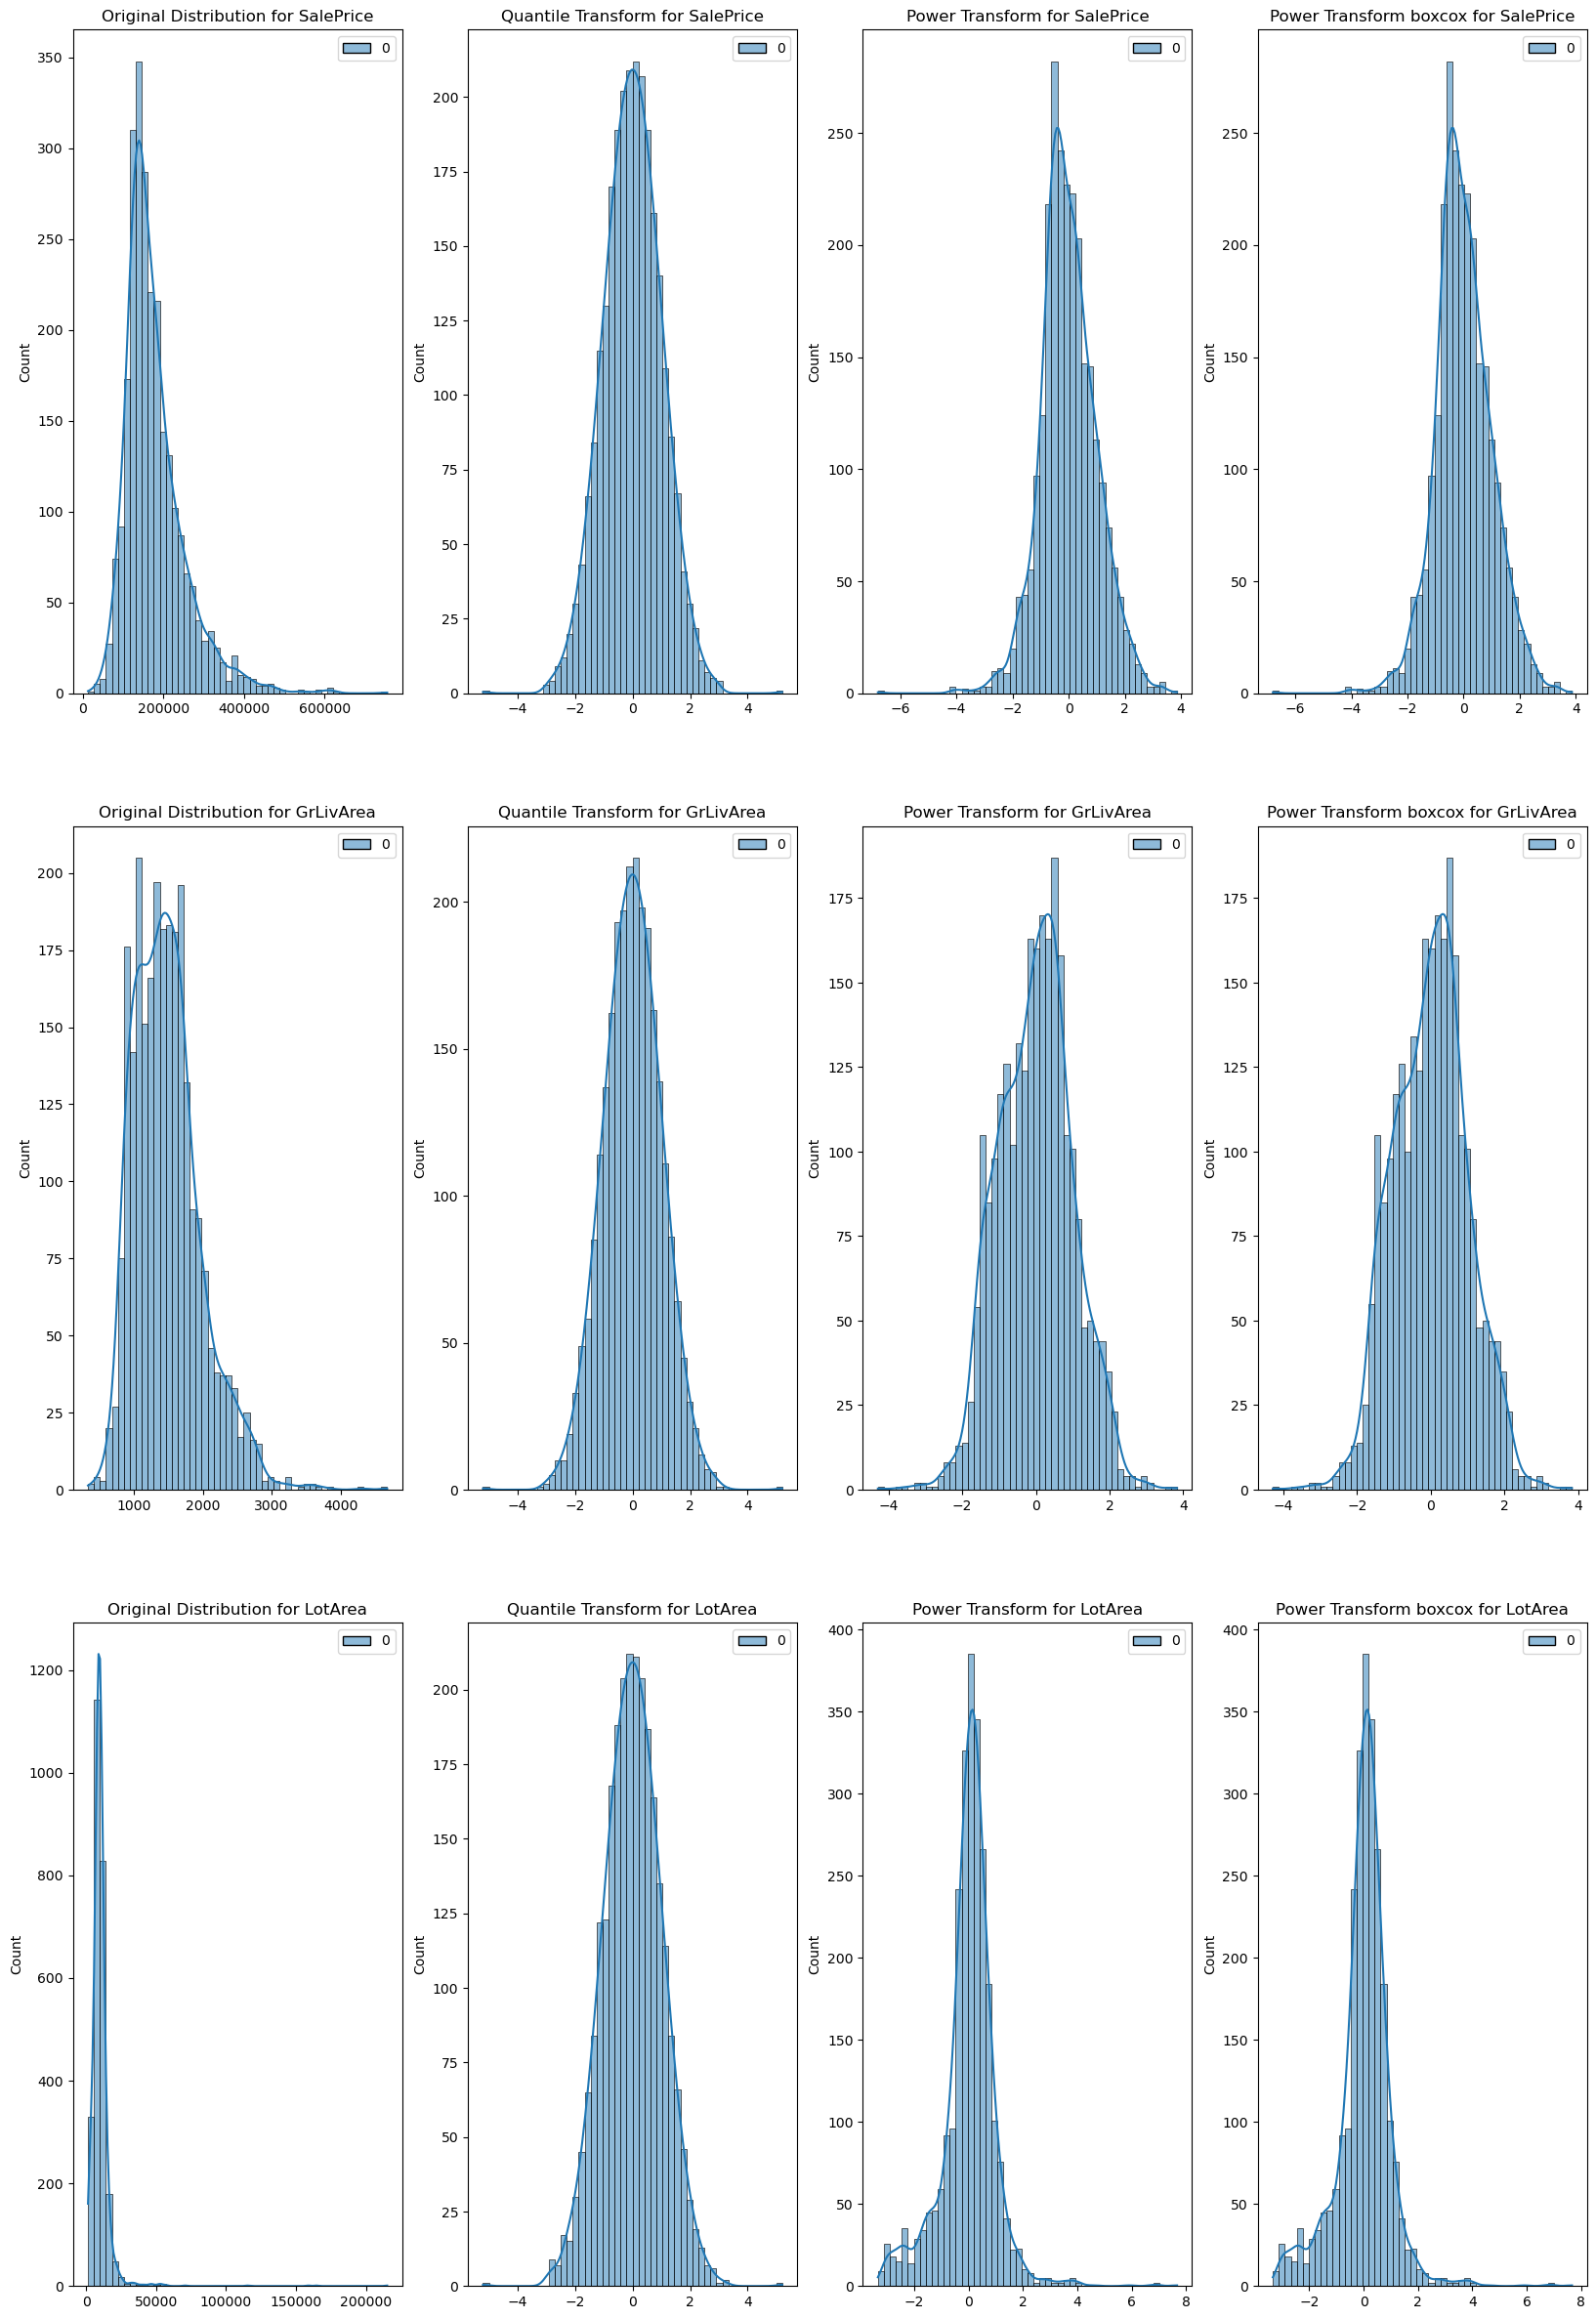

In [99]:
cols1 = ["SalePrice", "GrLivArea", "LotArea"]
def test_transformers(columns):
    pt = PowerTransformer()
    ptbc = PowerTransformer(method='box-cox')
    qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
    fig = plt.figure(figsize=(20,30))
    j = 1
    for i in columns:
        array = np.array(df[i]).reshape(-1, 1)
        y = pt.fit_transform(array)
        z = ptbc.fit_transform(array)
        x = qt.fit_transform(array)
        plt.subplot(3,4,j)
        sns.histplot(array, bins = 50, kde = True)
        plt.title(f"Original Distribution for {i}")
        plt.subplot(3,4,j+1)
        sns.histplot(x, bins = 50, kde = True)
        plt.title(f"Quantile Transform for {i}")
        plt.subplot(3,4,j+2)
        sns.histplot(y, bins = 50, kde = True)
        plt.title(f"Power Transform for {i}")
        plt.subplot(3,4,j+3)
        sns.histplot(z, bins = 50, kde = True)
        plt.title(f"Power Transform boxcox for {i}")
        j += 4
test_transformers(cols1)

In [90]:
cols1 = ["SalePrice", "GrLivArea", "LotArea"]
def test_transformers(columns):
    pt = StandardScaler()
    qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
    fig = plt.figure(figsize=(20,30))
    j = 1
    for i in columns:
        array = np.array(df[i]).reshape(-1, 1)
        y = log(array)
        x = qt.fit_transform(array)
        plt.subplot(3,3,j)
        sns.histplot(array, bins = 50, kde = True)
        plt.title(f"Original Distribution for {i}")
        plt.subplot(3,3,j+1)
        sns.histplot(x, bins = 50, kde = True)
        plt.title(f"Quantile Transform for {i}")
        plt.subplot(3,3,j+2)
        sns.histplot(y, bins = 50, kde = True)
        plt.title(f"Power Transform for {i}")
        j += 3
test_transformers(cols1)

NameError: name 'log' is not defined

<Figure size 2000x3000 with 0 Axes>

### Use loop to transform variables using quartile to get normal distribution

In [21]:
cols1 = ["SalePrice", "GrLivArea", "LotArea"]
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
for i in cols1:
    array = np.array(df[i]).reshape(-1, 1)
    x = qt.fit_transform(array)
    x = x.reshape(-1,1)
    df[i] = x


In [100]:
df

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,909176150,856,126000,30,RL,62.472926,7890,Pave,0.0,1,...,166,0,0.0,NaN,NaN,0,3,2010,WD,Normal
1,905476230,1049,139500,120,RL,42.000000,4235,Pave,0.0,1,...,0,0,0.0,NaN,NaN,0,2,2009,WD,Normal
2,911128020,1001,124900,30,C (all),60.000000,6060,Pave,0.0,1,...,0,0,0.0,NaN,NaN,0,11,2007,WD,Normal
3,535377150,1039,114000,70,RL,80.000000,8146,Pave,0.0,1,...,111,0,0.0,NaN,NaN,0,5,2009,WD,Normal
4,534177230,1665,227000,60,RL,70.000000,8400,Pave,0.0,1,...,0,0,0.0,NaN,NaN,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,903205040,952,121000,30,RL,70.105866,8854,Pave,0.0,1,...,40,0,0.0,NaN,NaN,0,5,2009,WD,Normal
2576,905402060,1733,139600,20,RL,108.318076,13680,Pave,0.0,2,...,0,0,0.0,NaN,NaN,0,6,2009,WD,Normal
2577,909275030,2002,145000,90,RH,82.000000,6270,Pave,0.0,1,...,0,0,0.0,NaN,NaN,0,8,2007,WD,Normal
2578,907192040,1842,217500,60,RL,69.884162,8826,Pave,0.0,1,...,0,0,0.0,NaN,NaN,0,7,2007,WD,Normal


In [107]:
len(num_cols)

57

In [116]:
numerical_columns = numerical_columns_selector(df)
categorical_columns = categorical_columns_selector(df)

In [129]:
df.SalePrice.skew()

1.7607507033716905

In [133]:
num_cols = df[numerical_columns].columns
j = 1
fig = plt.figure(figsize=(30,50))
for i in num_cols:
    array = np.array(df[i]).reshape(-1, 1) 
    sk = df[i].skew()
    sns.histplot(array, bins = 10, kde = True)
    plt.text(0.5, 0.5, sk,
           horizontalalignment='right', color='black', weight='bold',
           fontsize=14)
    plt.title(f"distribution for {i}")
    plt.subplot(10, 6,j)
    j += 1
    

ValueError: Image size of 152774x3914 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 3000x5000 with 59 Axes>

In [ ]:
num_cols = df[numerical_columns].columns
j = 1
fig = plt.figure(figsize=(30,40))
for i in num_cols:
    array = np.array(df[i]).reshape(-1, 1)   
    sns.histplot(array, bins = 10, kde = True)
    plt.title(f"distribution for {i}")
    plt.subplot(10, 6,j)
    j += 1

In [23]:
y = df.SalePrice
X = df.drop(['SalePrice', 'PID'], axis =1).copy()

In [24]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

In [25]:
numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

In [26]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", drop= 'first')
numerical_preprocessor = StandardScaler()

In [27]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    [
        ("standard_scaler", numerical_preprocessor, numerical_columns),
        ("one-hot-encoder", categorical_preprocessor, categorical_columns),
    ]
)

In [85]:
df[numerical_columns]

,GrLivArea,MSSubClass,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LandSlope,OverallQual,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold
0,-1.628954,30,62.472926,-0.529119,0.0,1,4,4,3,6,...,0,0,0,0,166,0,0.0,0,3,2010
1,-0.854577,120,42.000000,-1.375024,0.0,1,4,4,3,5,...,0,105,0,0,0,0,0.0,0,2,2009
2,-1.004417,30,60.000000,-1.018128,0.0,1,4,4,3,5,...,154,0,42,86,0,0,0.0,0,11,2007
3,-0.910128,70,80.000000,-0.433787,0.0,1,4,4,3,4,...,0,0,168,0,111,0,0.0,0,5,2009
4,0.508329,60,70.000000,-0.353856,0.0,1,4,4,3,8,...,0,45,0,0,0,0,0.0,0,11,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,-1.154008,30,70.105866,-0.183572,0.0,1,4,4,3,6,...,0,98,0,0,40,0,0.0,0,5,2009
2576,0.672914,20,108.318076,1.173732,0.0,2,4,4,3,3,...,0,0,0,0,0,0,0.0,0,6,2009
2577,1.115694,90,82.000000,-0.951276,0.0,1,2,4,3,5,...,0,0,0,0,0,0,0.0,0,8,2007
2578,0.866214,60,69.884162,-0.192398,0.0,1,4,4,3,7,...,193,96,0,0,0,0,0.0,0,7,2007


### Play around with data to see how transformed/normalized data does 

In [33]:
X_transform = pd.DataFrame(preprocessor.fit_transform(X))
X_transform

,0,1,2,3,4,5,6,7,8,9,...,197,198,199,200,201,202,203,204,205,206
0,-1.619324,-0.647048,-0.228004,-0.526112,-0.248037,-0.703943,0.294819,0.027859,0.213295,-0.034027,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.849565,1.455666,-0.647755,-1.366994,-0.248037,-0.703943,0.294819,0.027859,0.213295,-0.765323,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.998511,-0.647048,-0.278706,-1.012217,-0.248037,-0.703943,0.294819,0.027859,0.213295,-0.765323,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.904785,0.287491,0.131350,-0.431347,-0.248037,-0.703943,0.294819,0.027859,0.213295,-1.496619,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.505211,0.053856,-0.073678,-0.351890,-0.248037,-0.703943,0.294819,0.027859,0.213295,1.428565,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,-1.147210,-0.647048,-0.071507,-0.182618,-0.248037,-0.703943,0.294819,0.027859,0.213295,-0.034027,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2575,0.668814,-0.880683,0.711948,1.166625,-0.248037,1.048441,0.294819,0.027859,0.213295,-2.227916,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2576,1.108953,0.754761,0.172355,-0.945763,-0.248037,-0.703943,-3.153427,0.027859,0.213295,-0.765323,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2577,0.860962,0.053856,-0.076053,-0.191392,-0.248037,-0.703943,0.294819,0.027859,0.213295,0.697269,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [32]:
y

0      -0.798036
1      -0.416076
2      -0.841168
3      -1.115750
4       0.869142
          ...   
2575   -0.927054
2576   -0.414707
2577   -0.274673
2578    0.774090
2579    0.747255
Name: SalePrice, Length: 2579, dtype: float64

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_transform, y, random_state=42
)

In [39]:
from sklearn import linear_model 
import warnings
warnings.filterwarnings('ignore')

In [120]:
olr = linear_model.LinearRegression()
olr.fit(X_train, y_train)
print(olr.score(X_train, y_train))
print(olr.score(X_test, y_test))

0.9448295247285041
-5.689231640351916e+20


In [80]:
lasso = linear_model.Lasso(alpha = 0.00086)
lasso.fit(X_train, y_train)
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.9361252493553067
0.9360631703942689


In [134]:
ridge = linear_model.Ridge(alpha = 10)
ridge.fit(X_train, y_train)
print('train', ridge.score(X_train, y_train))
print('test', ridge.score(X_test, y_test))

train 0.9380379952456095
test 0.9365239434586177


In [78]:
ridge.set_params()
lasso.set_params()
ridge_scores_train = []
lasso_scores_train = []
ridge_scores_test  = []
lasso_scores_test  = []

alphas = np.linspace(0.0008, .001, 100)

for alpha in alphas:
            ridge.set_params(alpha=alpha)
            lasso.set_params(alpha=alpha)
            ridge.fit(X_train, y_train)
            lasso.fit(X_train, y_train)
            ridge_scores_train.append(ridge.score(X_train, y_train))
            ridge_scores_test.append(ridge.score(X_test, y_test))
            lasso_scores_train.append(lasso.score(X_train, y_train))
            lasso_scores_test.append(lasso.score(X_test, y_test))
ridge_scores_train = np.array(ridge_scores_train) 
ridge_scores_test  = np.array(ridge_scores_test)
lasso_scores_train = np.array(lasso_scores_train) 
lasso_scores_test  = np.array(lasso_scores_test)

Text(0, 0.5, '$R^2$')

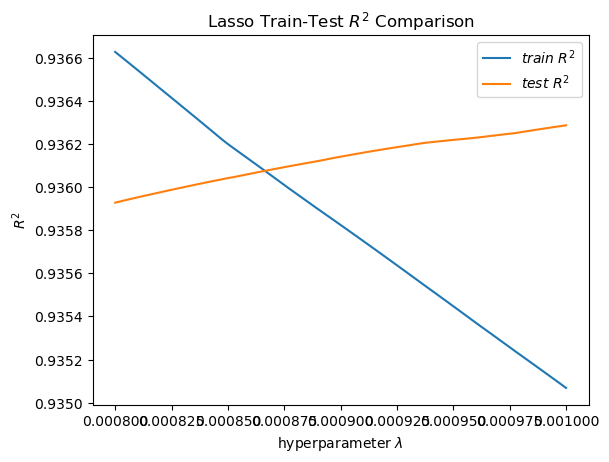

In [79]:
plt.plot(alphas, lasso_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, lasso_scores_test, label=r'$test\ R^2$')
plt.title(r'Lasso Train-Test $R^2$ Comparison')
lasso_underfit = lasso_scores_train < lasso_scores_test
last_underfit  = np.max(alphas[lasso_underfit])
#plt.axvline(last_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

## try things again using quartile transfomer on all numerical and no standarad scalar 